### TonEd Notebook

In [1]:
#import our stuff here
import IPython, numpy as np, scipy as sp, matplotlib.pyplot as plt, matplotlib, sklearn, librosa, cmath, math, os
from IPython.display import Audio
from sklearn.neighbors import NearestNeighbors

In [2]:
#test drive to make sure basic stuff works
sr = 44100.
full, sr = librosa.load("samples/EmilyOtt_Full.wav", sr)
Audio(full, rate=sr)

In [3]:
crunchy, sr = librosa.load("samples/EmilyOtt_Crunchy.wav", sr)
Audio(crunchy, rate=sr)

In [4]:
thin, sr = librosa.load("samples/EmilyOtt_Thin.wav", sr)
Audio(thin, rate=sr)

In [5]:
full_mfccs = librosa.feature.mfcc(y=full, sr=sr)
crunchy_mfccs = librosa.feature.mfcc(y=crunchy, sr=sr)
thin_mfccs = librosa.feature.mfcc(y=thin, sr=sr)

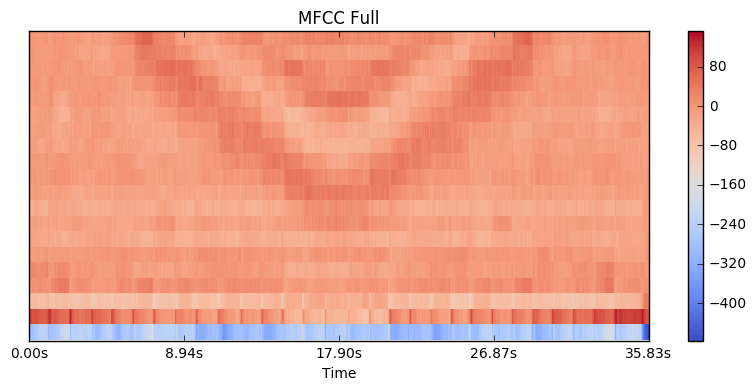

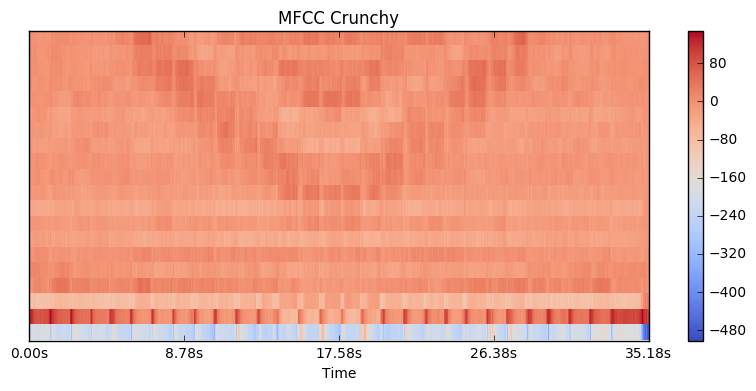

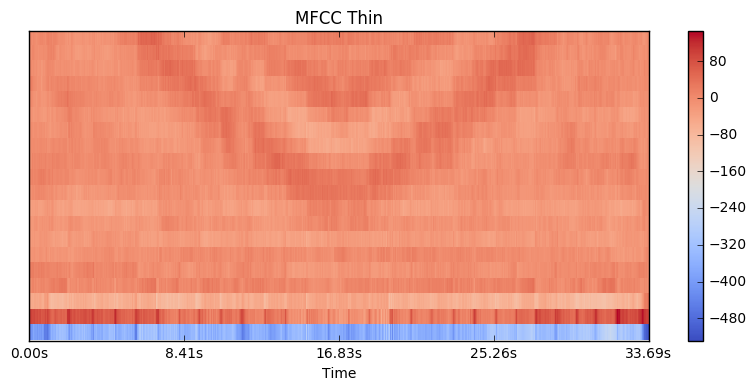

In [6]:
#plot each MFCC
plt.figure(figsize=(10,4))
librosa.display.specshow(full_mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC Full')
plt.show()

plt.figure(figsize=(10, 4))
librosa.display.specshow(crunchy_mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC Crunchy')
plt.show()

plt.figure(figsize=(10, 4))
librosa.display.specshow(thin_mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC Thin')
plt.show()

In [7]:
#clip each MFCC to the size of the smallest one

#num_zeros = full_mfccs.shape[1] - crunchy_mfccs.shape[1]
print full_mfccs.shape
print crunchy_mfccs.shape
print thin_mfccs.shape
#z = np.zeros((20, num_zeros))
clipped_size = min(full_mfccs.shape[1], crunchy_mfccs.shape[1], thin_mfccs.shape[1])
full_mfccs_clipped = full_mfccs[:, 0:clipped_size]
crunchy_mfccs_clipped = crunchy_mfccs[:, 0:clipped_size]
thin_mfccs_clipped = thin_mfccs[:, 0:clipped_size]
#print z.shape
#crunchy_mfccs_padded = np.concatenate((crunchy_mfccs, z), axis=1)
#full_mfccs_clipped = full_mfccs[:,0:-num_zeros]
print full_mfccs_clipped.shape
print crunchy_mfccs_clipped.shape
print thin_mfccs_clipped.shape

(20, 1544)
(20, 1516)
(20, 1452)
(20, 1452)
(20, 1452)
(20, 1452)


In [8]:
diff_crunchy_full = abs(crunchy_mfccs_clipped - full_mfccs_clipped)
diff_thin_full = abs(thin_mfccs_clipped - full_mfccs_clipped)
diff_thin_crunchy = abs(thin_mfccs_clipped - crunchy_mfccs_clipped)

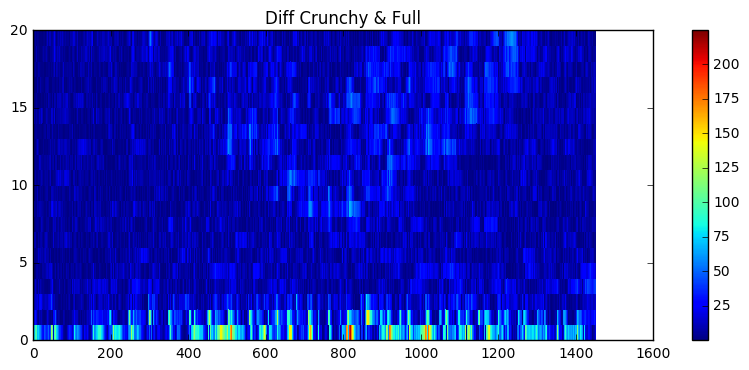

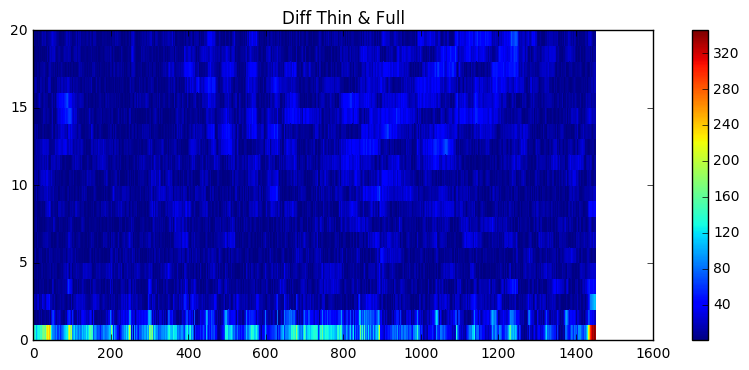

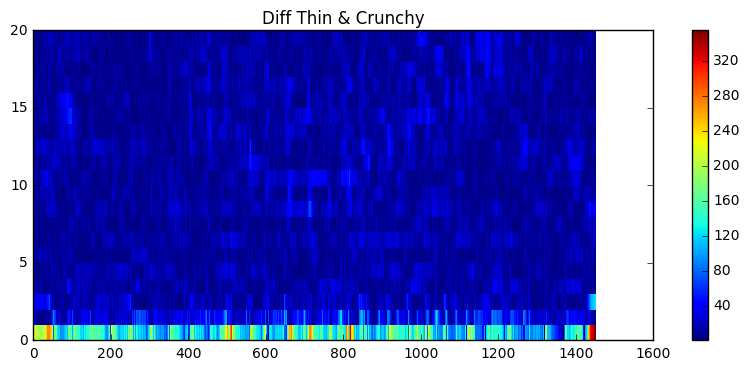

In [9]:
#plot the differences
TT, FF = np.meshgrid(np.arange(diff_crunchy_full.shape[0]+1), np.arange(diff_crunchy_full.shape[1]))

plt.figure(figsize=(10,4))
plt.pcolormesh(FF, TT, diff_crunchy_full.T)
plt.title('Diff Crunchy & Full')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,4))
plt.pcolormesh(FF, TT, diff_thin_full.T)
plt.title('Diff Thin & Full')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,4))
plt.pcolormesh(FF, TT, diff_thin_crunchy.T)
plt.title('Diff Thin & Crunchy')
plt.colorbar()
plt.show()

In [10]:
#take the average of each coeficcient through the whole sample to condense it into a (20, 1) size np array
full_mfccs_avg = np.average(full_mfccs, axis=1)
crunchy_mfccs_avg = np.average(crunchy_mfccs, axis=1)
thin_mfccs_avg = np.average(thin_mfccs, axis=1)
print full_mfccs_avg
print crunchy_mfccs_avg
print thin_mfccs_avg

[ -2.64484564e+02   2.26946463e+01  -6.09426917e+01   6.48691842e+00
  -7.94603038e+00  -3.36927927e+00  -3.15982756e+01  -1.26147136e+01
  -2.85890619e+01  -7.95977799e+00   2.05130148e+00  -2.30887904e-01
  -9.30407780e+00  -1.03223845e+01  -1.09000866e+01   2.45846970e+00
   4.42946398e+00   7.78878545e+00  -1.92327639e+00   7.87958591e+00]
[-214.00584816   25.89372492  -66.1061432     8.19352837  -13.90913785
   -1.219605    -35.60317396  -12.3455807   -34.40512304  -11.68274345
   -4.79760938   -3.50532946  -14.90729562  -11.94893448  -16.20924548
    2.05300475    1.72620333    6.71737568   -4.15018488   10.40796957]
[-347.17878534   41.99468462  -60.13647925    7.84500179   -4.63484447
   -3.34183585  -25.22862449  -11.72567266  -24.1932326    -5.22216576
    4.90272711    4.90116384   -5.8275973   -10.66470459   -9.98282551
    3.19032916    6.09294169    6.25569572    1.10016099    8.12797146]


In [11]:
full_crunchy_avg_diff = abs(full_mfccs_avg - crunchy_mfccs_avg)
full_thin_avg_diff = abs(full_mfccs_avg - thin_mfccs_avg)
thin_crunchy_avg_diff = abs(thin_mfccs_avg - crunchy_mfccs_avg)
print full_crunchy_avg_diff
print full_thin_avg_diff
print thin_crunchy_avg_diff

[ 50.47871545   3.19907859   5.16345152   1.70660995   5.96310747
   2.14967427   4.00489834   0.26913288   5.81606109   3.72296545
   6.84891086   3.27444156   5.60321782   1.62655001   5.30915883
   0.40546495   2.70326065   1.07140978   2.2269085    2.52838366]
[  8.26942217e+01   1.93000383e+01   8.06212428e-01   1.35808336e+00
   3.31118591e+00   2.74434135e-02   6.36965112e+00   8.89040910e-01
   4.39582935e+00   2.73761223e+00   2.85142563e+00   5.13205175e+00
   3.47648050e+00   3.42320125e-01   9.17261132e-01   7.31859459e-01
   1.66347771e+00   1.53308973e+00   3.02343738e+00   2.48385552e-01]
[ 133.17293717   16.10095969    5.96966394    0.34852659    9.27429338
    2.12223086   10.37454946    0.61990803   10.21189044    6.46057768
    9.70033649    8.40649331    9.07969832    1.28422988    6.22641996
    1.13732441    4.36673836    0.46167996    5.25034588    2.27999811]


In [12]:
#ok... now for the real thing
file_paths = []

for file in os.listdir("samples/"):
    if file.endswith("Full.wav"):
        file_paths.append(os.path.join("samples/", file))
        
for file in os.listdir("samples/"):
    if file.endswith("Crunchy.wav"):
        file_paths.append(os.path.join("samples/", file))
        
for file in os.listdir("samples/"):
    if file.endswith("Thin.wav"):
        file_paths.append(os.path.join("samples/", file))

print file_paths

sr = 44100.
i = 0

mfcc_avgs = np.zeros((len(file_paths), 20))
for path in file_paths:
    sample, sr = librosa.load(path, sr)
    mfcc = librosa.feature.mfcc(y=sample, sr=sr)
    mfcc_avg = np.average(mfcc, axis=1)
    mfcc_avgs[i] = mfcc_avg.T
    i = i+1

['samples/EmilyOtt_Full.wav', 'samples/KaitlinMoran_Full.wav', 'samples/AnnDuchow_Full.wav', 'samples/JonHuang_Full.wav', 'samples/MatthewNiemer_Full.wav', 'samples/MeganRenner_Full.wav', 'samples/MeganRenner_Crunchy.wav', 'samples/JonHuang_Crunchy.wav', 'samples/AnnDuchow_Crunchy.wav', 'samples/KaitlinMoran_Crunchy.wav', 'samples/EmilyOtt_Crunchy.wav', 'samples/MatthewNiemer_Crunchy.wav', 'samples/JonHuang_Thin.wav', 'samples/MatthewNiemer_Thin.wav', 'samples/AnnDuchow_Thin.wav', 'samples/KaitlinMoran_Thin.wav', 'samples/MeganRenner_Thin.wav', 'samples/EmilyOtt_Thin.wav']


In [13]:
#try the Nearest Neighbor classifier
#results for first 5 should be 0-4
#results for next 5 should be 5-9
#results for last 5 should be 10-14

indices = []
for i in range(len(mfcc_avgs)):
    cross_validation_set = np.concatenate((mfcc_avgs[0:i], mfcc_avgs[i+1:]))
    #print cross_validation_set
    neigh = NearestNeighbors(n_neighbors=3)
    neigh.fit(cross_validation_set)
    index = neigh.kneighbors(mfcc_avgs[i], return_distance = False)
    indices.append(index)
print indices   

#test = mfcc_avgs[-1]
#mfcc_avgs_test = mfcc_avgs[:-1]
#neigh = NearestNeighbors(n_neighbors=1)
#neigh.fit(mfcc_avgs_test)
#index = neigh.kneighbors(test, 1, return_distance = False)
#print index

[array([[9, 3, 4]]), array([[14,  8, 13]]), array([[ 7,  8, 16]]), array([[ 6, 11, 15]]), array([[12, 15,  4]]), array([[15,  4,  5]]), array([[ 5, 10,  9]]), array([[ 3, 15, 12]]), array([[ 2, 16, 15]]), array([[ 1,  2, 13]]), array([[0, 5, 6]]), array([[6, 5, 4]]), array([[ 3,  7, 12]]), array([[ 4, 15,  3]]), array([[ 1,  9, 16]]), array([[ 1,  9, 14]]), array([[13,  5,  4]]), array([[8, 2, 9]])]


/home/mattniemer/miniconda2/envs/eecs352/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/mattniemer/miniconda2/envs/eecs352/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/mattniemer/miniconda2/envs/eecs352/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single

In [15]:
#try basic SVM
classes = ['Full']*6 + ['Crunchy']*6 + ['Thin']*6
results = []
for i in range(len(mfcc_avgs)):
    cross_validation_set = np.concatenate((mfcc_avgs[0:i], mfcc_avgs[i+1:]))
    cross_validation_classes = np.concatenate((classes[0:i], classes[i+1:]))
    clf = sklearn.svm.SVC()
    clf.fit(cross_validation_set, cross_validation_classes)  
    result = clf.predict(mfcc_avgs[i])
    results.append(result)
print results  

[array(['Crunchy'], 
      dtype='|S32'), array(['Thin'], 
      dtype='|S7'), array(['Crunchy'], 
      dtype='|S7'), array(['Crunchy'], 
      dtype='|S7'), array(['Thin'], 
      dtype='|S7'), array(['Crunchy'], 
      dtype='|S7'), array(['Full'], 
      dtype='|S7'), array(['Full'], 
      dtype='|S7'), array(['Full'], 
      dtype='|S7'), array(['Full'], 
      dtype='|S7'), array(['Full'], 
      dtype='|S7'), array(['Full'], 
      dtype='|S7'), array(['Full'], 
      dtype='|S7'), array(['Full'], 
      dtype='|S7'), array(['Full'], 
      dtype='|S7'), array(['Full'], 
      dtype='|S7'), array(['Full'], 
      dtype='|S7'), array(['Crunchy'], 
      dtype='|S32')]


/home/mattniemer/miniconda2/envs/eecs352/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/mattniemer/miniconda2/envs/eecs352/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/mattniemer/miniconda2/envs/eecs352/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single